# Task Statement

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

You need to:

1. Prepare the data;
2. Perform data analysis;
3. Develop and train a model.

In [1]:
#Import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Data Preparation
### Reading in the dataset

In [6]:
#load the datasets
df_train = pd.read_csv('gold_recovery_train.csv') 
df_test = pd.read_csv('gold_recovery_test.csv')
df_full = pd.read_csv('gold_recovery_full.csv')

In [8]:
#look into the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [12]:
#Looking at the shapes
display(df_train.shape)
display(df_test.shape)
display(df_full.shape)


(16860, 87)

(5856, 53)

(22716, 87)

In [14]:
display(df_train.describe())
display(df_test.describe())
display(df_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [16]:
df_train['rougher.output.recovery'].head(10)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
Name: rougher.output.recovery, dtype: float64

### Checking That Recovery is Calulated Correctly:

In [18]:
# Function to calculate recovery
def recovery(df, C, F, T):
    rec = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return rec

vals_pred = recovery(df_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
vals_act = df_train['rougher.output.recovery'].dropna().to_list()


#Import
from sklearn.metrics import mean_absolute_error

print(f'Mean Absolute Error: {mean_absolute_error(vals_act, vals_pred)}')

Mean Absolute Error: 9.303415616264301e-15


From the MAE calculation above, we can see that the near 0 MAE corresponds to little to no difference between actual and predicted recovery.Therefore, recovery was calculated correctly.

### Analyzing the Features not Available in the Test Set

In [20]:
#Comparing column names of df_train and df_test
df_difference = pd.DataFrame(df_train.columns.difference(df_test.columns))
print('Features not Available in the Test Set: \n', df_difference)


Features not Available in the Test Set: 
                                                     0
0                         final.output.concentrate_ag
1                         final.output.concentrate_au
2                         final.output.concentrate_pb
3                        final.output.concentrate_sol
4                               final.output.recovery
5                                final.output.tail_ag
6                                final.output.tail_au
7                                final.output.tail_pb
8                               final.output.tail_sol
9               primary_cleaner.output.concentrate_ag
10              primary_cleaner.output.concentrate_au
11              primary_cleaner.output.concentrate_pb
12             primary_cleaner.output.concentrate_sol
13                     primary_cleaner.output.tail_ag
14                     primary_cleaner.output.tail_au
15                     primary_cleaner.output.tail_pb
16                    primary_cleaner.ou

All of the features not available in the test set are of type Float64. They are all either Output or Calculation.

### Data Preprocessing

In [24]:
#Checking for Duplicates
df_train.duplicated().sum() #train dataframe

0

In [26]:
df_test.duplicated().sum() #test dataframe

0

In [28]:
df_full.duplicated().sum() #full dataframe

0

There are no duplicate rows in either of the three dataframes.

In [31]:
#Checking for Missing Values
train_missing = df_train.isna().sum() / len(df_train) * 100
train_missing

date                                          0.000000
final.output.concentrate_ag                   0.427046
final.output.concentrate_pb                   0.427046
final.output.concentrate_sol                  2.194543
final.output.concentrate_au                   0.421115
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.504152
secondary_cleaner.state.floatbank5_b_air      0.504152
secondary_cleaner.state.floatbank5_b_level    0.498221
secondary_cleaner.state.floatbank6_a_air      0.610913
secondary_cleaner.state.floatbank6_a_level    0.504152
Length: 87, dtype: float64

In [15]:
test_missing = df_test.isna().sum() / len(df_test) * 100
test_missing

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [33]:
full_missing = df_full.isna().sum() / len(df_full) * 100
full_missing

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

There is too large a percentage (>5%) of missing data for that data to be dropped.

In [36]:
#Checking for Rows with Missing Targets
df_train[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

rougher.output.recovery    2573
final.output.recovery      1521
dtype: int64

In [38]:
df_full[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

rougher.output.recovery    3119
final.output.recovery      1963
dtype: int64

In [40]:
#Dropping Rows with Missing Targets
df_train = df_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).reset_index()
df_full = df_full.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).reset_index()

In [42]:
#Filling in missing values with the column median

df_train = df_train.fillna(df_train.median(numeric_only=True))
df_test = df_test.fillna(df_test.median(numeric_only=True))
df_full = df_full.fillna(df_full.median(numeric_only=True))

In [44]:
#Checking once again for missing values

display(df_train.info())
display(df_test.info())
display(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               14149 non-null  int64  
 1   date                                                14149 non-null  object 
 2   final.output.concentrate_ag                         14149 non-null  float64
 3   final.output.concentrate_pb                         14149 non-null  float64
 4   final.output.concentrate_sol                        14149 non-null  float64
 5   final.output.concentrate_au                         14149 non-null  float64
 6   final.output.recovery                               14149 non-null  float64
 7   final.output.tail_ag                                14149 non-null  float64
 8   final.output.tail_pb                                14149 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               19439 non-null  int64  
 1   date                                                19439 non-null  object 
 2   final.output.concentrate_ag                         19439 non-null  float64
 3   final.output.concentrate_pb                         19439 non-null  float64
 4   final.output.concentrate_sol                        19439 non-null  float64
 5   final.output.concentrate_au                         19439 non-null  float64
 6   final.output.recovery                               19439 non-null  float64
 7   final.output.tail_ag                                19439 non-null  float64
 8   final.output.tail_pb                                19439 non-null  float64


None

## Data Analysis
### Note how Concentrations of Metals change depending on the purification stage

**Silver**

In [46]:
#Creating silver dataframe
silver = df_full[['rougher.input.feed_ag','rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].copy()
silver.info()
silver_stats = silver.describe()
display(silver_stats)
display(silver)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_ag                  19439 non-null  float64
 1   rougher.output.concentrate_ag          19439 non-null  float64
 2   primary_cleaner.output.concentrate_ag  19439 non-null  float64
 3   final.output.concentrate_ag            19439 non-null  float64
dtypes: float64(4)
memory usage: 607.6 KB


,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.794927,11.994759,8.442408,5.168465
std,1.936847,2.733862,2.054465,1.372313
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251365
50%,8.593574,12.098115,8.507298,5.066094
75%,10.213771,13.736996,9.809001,5.895401
max,14.596026,24.480271,16.081632,16.001945


,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599
...,...,...,...,...
19434,6.091855,11.124896,6.559174,3.224920
19435,6.121323,11.425983,6.612376,3.195978
19436,5.970515,8.523497,7.128896,3.109998
19437,6.048130,11.658799,7.490444,3.367241


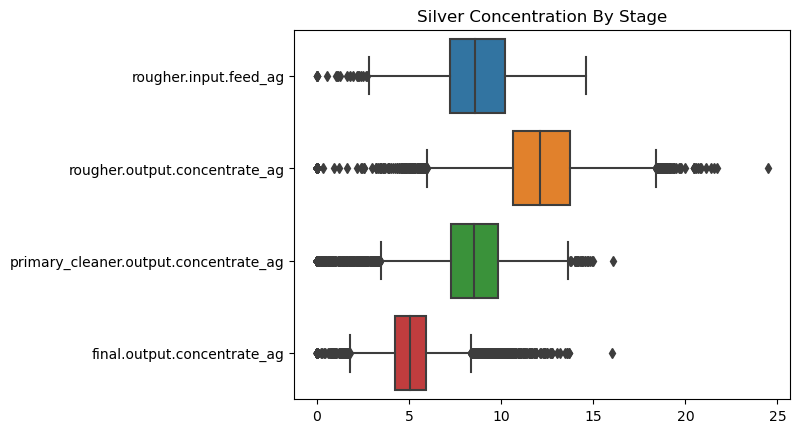

In [48]:
#Plotting silver boxplots
sns.boxplot(data=silver, orient='h')
plt.title("Silver Concentration By Stage")
plt.show()

**Gold**

In [50]:
#Creating gold dataframe
gold = df_full[['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].copy()
gold.info()
gold_stats = gold.describe()
display(gold_stats)
display(gold)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_au                  19439 non-null  float64
 1   rougher.output.concentrate_au          19439 non-null  float64
 2   primary_cleaner.output.concentrate_au  19439 non-null  float64
 3   final.output.concentrate_au            19439 non-null  float64
dtypes: float64(4)
memory usage: 607.6 KB


,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
19434,5.335862,18.603550,32.940215,46.713954
19435,4.838619,18.441436,32.925325,46.866780
19436,4.525061,15.111231,31.856742,46.795691
19437,4.362781,17.834772,30.770892,46.408188


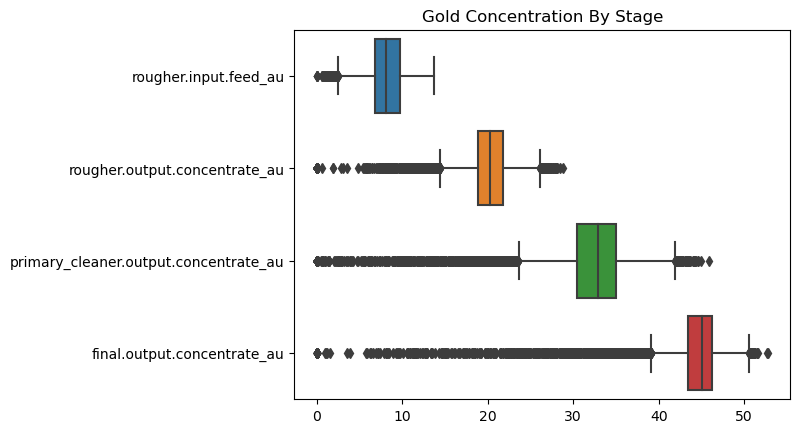

In [52]:
#Plotting gold boxplots
sns.boxplot(data=gold, orient='h')
plt.title("Gold Concentration By Stage")
plt.show()

**Lead**

In [55]:
#Creating led dataframe
lead = df_full[['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].copy()
lead.info()
lead_stats = lead.describe()
display(lead_stats)
display(lead)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_pb                  19439 non-null  float64
 1   rougher.output.concentrate_pb          19439 non-null  float64
 2   primary_cleaner.output.concentrate_pb  19439 non-null  float64
 3   final.output.concentrate_pb            19439 non-null  float64
dtypes: float64(4)
memory usage: 607.6 KB


,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,3.597760,7.606272,9.831457,9.978901
std,1.046793,1.796757,2.549324,1.669197
min,0.010000,0.000000,0.000000,0.000000
25%,2.891939,6.725987,8.712931,9.137280
50%,3.534895,7.742580,10.152433,10.102433
75%,4.241005,8.565199,11.414845,11.035644
max,7.142594,13.617072,17.081278,17.031899


,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511
...,...,...,...,...
19434,4.617558,10.984003,12.445966,11.356233
19435,4.144989,10.888213,12.623947,11.349355
19436,4.020002,8.955135,12.633558,11.434366
19437,3.902537,10.655377,12.012378,11.625587


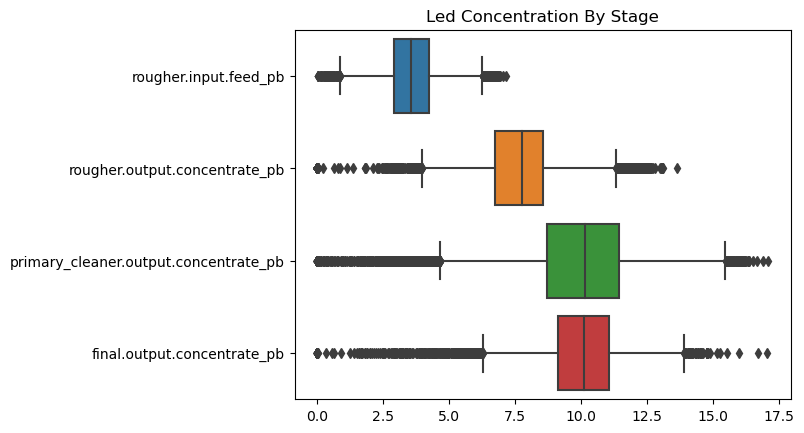

In [57]:
#Plotting lid boxplots
sns.boxplot(data=lead, orient='h')
plt.title("Led Concentration By Stage")
plt.show()

During each subsequent stage of the purification process, the concentration of gold (au) is consistently increasing, while the concentration of silver (ag) actually decreased, and the concentration of lead (pb) experienced a slight uptick.

### Compare the feed particle size distributions in the training set and in the test set

The two feed particle size features are rougher.input.feed_size and primary_cleaner.input.feed_size.

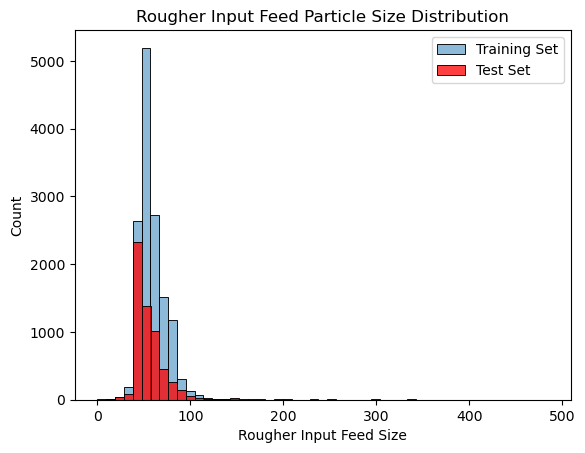

In [61]:
#Rougher Input Feed Size

sns.histplot(df_train['rougher.input.feed_size'], bins=50, label="Training Set", alpha=0.5) #Training Set
sns.histplot(df_test['rougher.input.feed_size'], bins=50, label="Test Set", color='red') #Test Set
plt.title("Rougher Input Feed Particle Size Distribution")
plt.legend()
plt.xlabel('Rougher Input Feed Size')
plt.show()



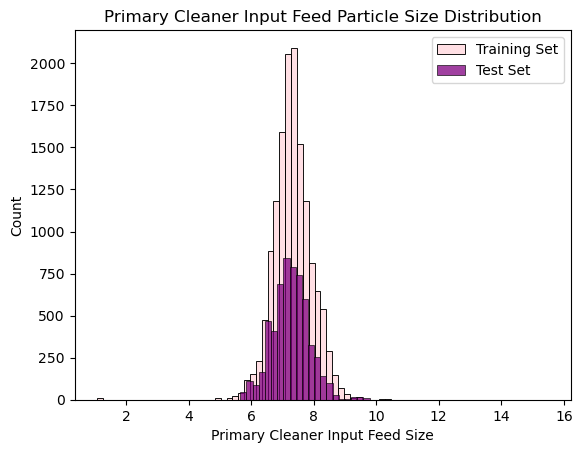

In [63]:
#Primary Cleaner Input Feed Size
sns.histplot(df_train['primary_cleaner.input.feed_size'], bins=50, label="Training Set", color='pink', alpha=0.5) #Training Set
sns.histplot(df_test['primary_cleaner.input.feed_size'], bins=50, label="Test Set", color='purple') #Test Set
plt.title("Primary Cleaner Input Feed Particle Size Distribution")
plt.legend()
plt.xlabel('Primary Cleaner Input Feed Size')
plt.show()

Seen from the above plots, the training and test sets have the same distribution for the primary_cleaner.input.feed_size, which appears to be normal. The sets are both slightly skewed the right for primary_cleaner.input.feed_size. Their distribution is close but does not appear exact. 

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.

In [66]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               19439 non-null  int64  
 1   date                                                19439 non-null  object 
 2   final.output.concentrate_ag                         19439 non-null  float64
 3   final.output.concentrate_pb                         19439 non-null  float64
 4   final.output.concentrate_sol                        19439 non-null  float64
 5   final.output.concentrate_au                         19439 non-null  float64
 6   final.output.recovery                               19439 non-null  float64
 7   final.output.tail_ag                                19439 non-null  float64
 8   final.output.tail_pb                                19439 non-null  float64


In [68]:
#Summing up concentrations of substances at each stage
raw_feed = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb']
rougher_concentrate = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb']
final_concentrate = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb']

#Display
print('Raw Feed Stage:')
display(raw_feed.head())
print('Rougher Concentrate Stage:')
display(rougher_concentrate.head())
print('Final Concentrate Stage:')
display(final_concentrate.head())

Raw Feed Stage:


0    14.871440
1    14.905729
2    14.638299
3    14.199305
4    13.511497
dtype: float64

Rougher Concentrate Stage:


0    38.395653
1    38.945647
2    38.649756
3    38.411473
4    38.867359
dtype: float64

Final Concentrate Stage:


0    58.137072
1    58.699942
2    58.927421
3    58.714815
4    59.065251
dtype: float64

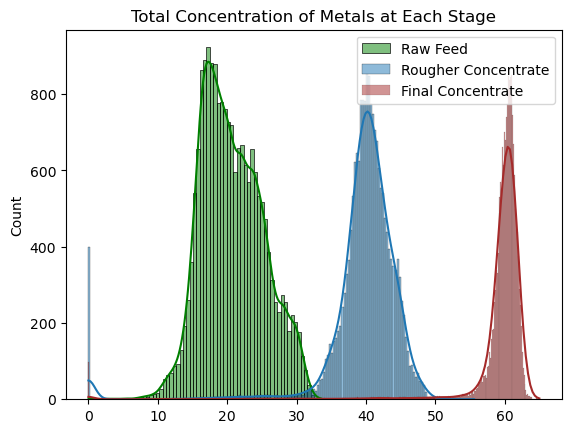

In [70]:
#Plot the total concentration of metals at certain stages
sns.histplot(data=raw_feed, color='green', alpha=0.5, legend=True, kde=True, label='Raw Feed')
sns.histplot(data=rougher_concentrate, legend=True, kde=True, label='Rougher Concentrate')
sns.histplot(data=final_concentrate, color="brown", legend=True, kde=True, label='Final Concentrate')
plt.legend()
plt.title('Total Concentration of Metals at Each Stage')
plt.show()

While the total concentration of all substances gradually increases each stage, there is a large amount of '0' values present in the three stages. 

In [73]:
#Remove Zeros

features_input_concentrate= [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]

features_rough_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

features_final_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]



threshold = 0.01

df_train2 = df_train[df_train[features_input_concentrate].sum(1) > threshold].reset_index()
df_train2 = df_train[df_train[features_rough_concentrate].sum(1) > threshold].reset_index()
df_train2 = df_train[df_train[features_final_concentrate].sum(1) > threshold].reset_index()

print(df_train.shape)
print(df_train2.shape)

(14149, 88)
(14091, 89)


In [75]:
df_full_test = df_full.loc[df_test.index]
df_test = df_test[df_full_test[features_input_concentrate].sum(1) > threshold]
df_test = df_test[df_full_test[features_rough_concentrate].sum(1) > threshold]
df_test = df_test[df_full_test[features_final_concentrate].sum(1) > threshold]

df_test.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2560\190553268.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[df_full_test[features_final_concentrate].sum(1) > threshold]


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


## Build the Model
### Write a function to calculate the final sMAPE value

In [78]:
def smape (y, yhat):
    numerator = (y - yhat).abs()
    denominator = (y.abs() + yhat.abs()) / 2
    return (numerator/denominator).mean()

In [80]:
def fsmape (y, yhat):
    rougher = smape(y[0], yhat[0])
    final = smape(y[1], yhat[1])
    return .25 * rougher + .75 * final

In [82]:
df_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [84]:
df_train_2 = df_train2[df_test.columns]
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14091 entries, 0 to 14090
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14091 non-null  object 
 1   primary_cleaner.input.sulfate               14091 non-null  float64
 2   primary_cleaner.input.depressant            14091 non-null  float64
 3   primary_cleaner.input.feed_size             14091 non-null  float64
 4   primary_cleaner.input.xanthate              14091 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14091 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14091 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14091 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14091 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14091 non-null  float64
 10  primary_cl

**Defining features and target for training and testing sets:**

In [87]:
#Dropping the date column for modeling
df_train_2 = df_train_2.drop(['date'], axis=1)
df_test = df_test.drop(['date'], axis=1)


In [89]:
#Training Features and Target
features_train = df_train_2
target_train = df_train2[['rougher.output.recovery', 'final.output.recovery']]

In [91]:
#Testing Features and Target
features_test = df_test
target_test =  df_full[['rougher.output.recovery', 'final.output.recovery']].loc[df_test.index].reset_index(drop=True)

target_test.shape

(5739, 2)

In [93]:
#Create function to calculate sMAPE.
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

#Create function to calculate final sMAPE.
def fsmape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true[:, 0], y_true[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

In [95]:
pred_median = target_train.copy()
pred_median['rougher.output.recovery'] = target_train['rougher.output.recovery'].median()
pred_median['final.output.recovery'] = target_train['final.output.recovery'].median()
print('Weighted sMAPE on Target Train:')
print(fsmape(target_train.values, pred_median.values))

pred_median = target_test.copy()
pred_median['rougher.output.recovery'] = target_train['rougher.output.recovery'].median()
pred_median['final.output.recovery'] = target_train['final.output.recovery'].median()
print('Weighted sMAPE on Target Test:')
print(fsmape(target_test.values, pred_median.values))

Weighted sMAPE on Target Train:
10.530652170755857
Weighted sMAPE on Target Test:
9.401521376114193


In [31]:
display(features_train.shape)
display(target_train.shape)

(14091, 52)

(14091, 2)

In [32]:
display(target_train)

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
14086,89.574376,73.755150
14087,87.724007,69.049291
14088,88.890579,67.002189
14089,89.858126,65.523246


In [97]:
display(features_test.shape)
display(target_test.shape)

(5739, 52)

(5739, 2)

### Train Different Models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [100]:
#Import
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

**Scoring**

In [103]:
def score_model(model, cv=4):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        
        scores.append(fsmape(target_valid.values, pred_valid.values))
        
    return pd.Series(scores).mean()


**Linear Regression**

In [106]:
features = df_test.columns.values
features_train = df_train2[features].reset_index(drop=True)

targets = ['rougher.output.recovery', 'final.output.recovery']
target_train = df_train2[targets].reset_index(drop=True)

In [108]:
target_train.columns = [0, 1]
target_test.columns = [0, 1]

In [110]:
model = LinearRegression()
lr_score = score_model(model)
print("LR:", lr_score)

LR: 11.713571886360327


**Random Forest**

In [113]:
%%time

for depth in range(1, 7):
    model = RandomForestRegressor(max_depth=depth, n_estimators=50, random_state=12345)
    score = score_model(model)
    print("RF, depth =", depth, "score =", score)

RF, depth = 1 score = 11.435401114175036
RF, depth = 2 score = 10.962671001187832
RF, depth = 3 score = 10.79987383934577
RF, depth = 4 score = 10.444597194924754
RF, depth = 5 score = 10.345706618276584
RF, depth = 6 score = 10.569154670470638
CPU times: total: 8min 16s
Wall time: 8min 26s


**Decision Tree**

In [115]:
%%time

for depth in range(1, 7):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    score = score_model(model)
    print("DT, depth =", depth, "score =", score)

DT, depth = 1 score = 11.592616918733757
DT, depth = 2 score = 11.12790705247079
DT, depth = 3 score = 10.873483870376138
DT, depth = 4 score = 10.430622711447741
DT, depth = 5 score = 10.610129469129031
DT, depth = 6 score = 11.022443924427277
CPU times: total: 12.4 s
Wall time: 13.5 s


**Final Model Testing**

In [117]:
#Best Model
best_model = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
best_model.fit(features_train, target_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)

In [119]:
#Dummy Regressor
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(features_train, target_train)
test_pred = dummy_regr.predict(features_test)
test_score = fsmape(target_test.values,test_pred)

print('sMAPE Score on Dummy Regressor:', test_score)

sMAPE Score on Dummy Regressor: 9.401521376114193


In [121]:
#Obtain final sMAPE score for model using testing datasets.
best_model_smape = round(fsmape(target_test.values, best_model.predict(features_test.values)), 2)

#Print the result.
print(f'sMAPE score for best model on test datasets: {best_model_smape}')

sMAPE score for best model on test datasets: 11.28


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Conclusion**

Random Forest at a max depth of 5 is the best performing model with a final sMAPE score of 10.35 on the training set and 11.28 on the testing set. This accuracy comes with a much lower speed than both Linear Regression and Decision Tree models. 

Comparing this best model to the Dummy Regressor, we find that it did not perform better.